In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [4]:
df = pd.read_csv("../venv/tmdb_5000_movies.csv")
movies = pd.DataFrame(df)

In [ ]:
movies.head()  # MUESTRO LAS PRIMERAS 5 FILAS DEL DATASET

In [ ]:
movies.isnull().sum()  # VEO CUALES SON LOS DATOS FALTANTES DEL DATASET

In [ ]:
movies.drop(['homepage', 'tagline', 'overview'], axis = 'columns', inplace=True) # ELIMINO COLUMNAS QUE NO VOY A UTILIZAR PARA EL ANALISIS

In [41]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [10]:
movies.dropna(inplace=True)  # ELIMINO LAS FILAS NULAS QUE FALTAN PARA TENERLO LIMPIO PARA EL ANALISIS

In [45]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,88292.839372,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.750000,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
movies.info()

In [ ]:
def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()

In [ ]:
stats.trim_mean(df[['popularity','vote_average','runtime','revenue']], 0.05)
weighted_average(df, "vote_average", "vote_count")

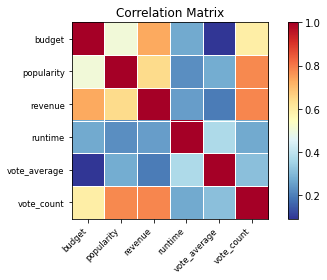

In [43]:
corr = movies.set_index('id').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))  # GRAFICO HEATMAP
plt.show()

In [47]:
def convert(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i["name"])
    return l